# Tobig's 21기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크다운 또는 주석으로 설명해주세요

## 데이터

In [109]:
import pandas as pd
import numpy as np
import random

In [110]:
#data = pd.read_csv('assignment_2.csv')
data = pd.read_csv('/content/sample_data/assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [113]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다.

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [115]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [116]:
# parameter 개수
N = len(X_train.loc[0])

In [117]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.21529438, 0.88753876, 0.12624771])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
##$$
z = \mathbf{v} \cdot \mathbf{w} = \sum_{i=1}^{n} v_i \cdot w_i
$$


In [118]:
def dot_product(X, parameters):
    z = np.dot(X, parameters)
    return z

## Logistic Function

##$$
p = \frac{1}{1 + e^{-z}}
$$

In [119]:
def logistic(X, parameters):
    z = np.dot(X, parameters)
    p = 1 / (1+ np.exp(-z))
    return p

In [120]:
logistic(X_train.iloc[1], parameters)

0.7812682109066954

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$. 1/2 은 계산상의 편의를 위해 곱합니다
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 sum 형태까지만 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = -\Sigma \left( y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right)$

In [121]:
＃Cross Entropy Loss 계산
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)
    loss = -(y * np.log(p) + (1-y) * np.log(1-p))
    return loss

In [122]:
＃MSE Loss 계산
def mse_i(X, y, parameters):
    y_hat = np.dot(X, parameters)
    loss = (y_hat-y)**2 / 2
    return loss

In [123]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n: 현재 배치의 데이터 수
    loss = 0
    for i in range(n):
        loss_i = loss_function(X_set.iloc[i], y_set.iloc[i], parameters)
        loss += loss_i
    loss = loss/n #loss 평균값으로 계산
    return loss

In [124]:
batch_loss(X_test, y_test, parameters, mse_i, len(X_test))

0.5791101307152625

In [125]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

0.936199032522981

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## $${\partial\over{\partial \theta_j}}l(\theta)= \Sigma (y_i - \theta^T X_i) \cdot X_{ij}
$$
##$${\partial\over{\partial \theta_j}}l(p)= \Sigma (p_i - y_i) \cdot X_{ij}
$$

In [126]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = dot_product(X, parameters)
        gradient =  -(y-y_hat) * X[j]
    else:
        p = logistic(X, parameters)
        gradient = -(y - p) * X[j]
    return gradient

In [127]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'linear')

-0.1432283643503556

In [128]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.08283263699791807

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [129]:
def batch_gradient(X_set, y_set, parameters, model):

    gradients = [0 for _ in range(len(parameters))]
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)

    return gradients

In [130]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'linear')
gradients1

[-9.705843326339304, 129.106592194933, 131.81449564749715]

In [131]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[39.23499039795458, 13.69667329323171, 39.2497381768277]

## mini-batch
인덱스로 미니 배치 나누기

In [132]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명:
주어진 데이터셋 X_train을 지정된 batch_size로 나누어 인덱스 리스트를 생성한다. 주어진 데이터셋의 크기를 고려하여 데이터를 미니배치로 나누고, 나머지 데이터가 있는 경우에는 마지막 미니배치로 처리한다. 반환되는 인덱스 리스트는 각 미니배치에 해당하는 원본 데이터의 인덱스들로 구성된다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [133]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= (1/ n) * learning_rate
    parameters -= gradients

    return parameters

In [134]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.21267871, 0.88662564, 0.12363106])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기 갱신시 사용하는 1번의 데이터셋  
- epoch: 전체 데이터셋에 대한 한 번의 반복
- num_epoch: 총 학습 에포크 수  
<br>

BGD: 전체 데이터를 사용해 업데이트
SGD: 1개의 데이터를 사용해 업데이트
MGD: 일부 데이터 사용해 업데이트
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> SGD
batch_size=k -> MGD  
batch_size=whole -> BGD  

In [135]:
def gradient_descent(X_train, y_train, learning_rate=0.1, num_epoch=1000, tolerance=0.00001, model='logistic', batch_size=16):
    stopper = False

    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)

    for epoch in range(num_epoch):
        if stopper:
            break

        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]

            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            current_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))

            # 중단 조건
            if abs(current_loss - loss) < tolerance:
                stopper = True
                break
            loss = current_loss

        # 100 epoch마다 학습 상태 출력
        if epoch % 100 == 0:
            print(f"epoch: {epoch}  loss: {current_loss}  params: {parameters}  gradients: {gradients}")

    return parameters


## Implement
경사하강법 함수를 이용해 최적의 모수를 찾아보세요. 학습을 진행할 때, hyperparameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

default: learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16

In [136]:
new_param_bgd = gradient_descent(X_train, y_train, batch_size=X_train.shape[0])
new_param_bgd

epoch: 0  loss: 0.7896245022141464  params: [0.09308988 0.3072007  0.49014095]  gradients: [0.024400221203996365, 0.0035878500936267184, 0.025978728267703137]
epoch: 100  loss: 0.4602719220079464  params: [-0.85402496  0.81262094 -0.72683307]  gradients: [0.003004578872701077, -0.006489642973216038, 0.0068659197995106355]
epoch: 200  loss: 0.39560055894737695  params: [-1.03394268  1.36190913 -1.27842434]  gradients: [0.0012015734880252585, -0.004616731782852407, 0.004530838103877199]
epoch: 300  loss: 0.36355366383135074  params: [-1.13465673  1.75935983 -1.66632432]  gradients: [0.0008761304655865062, -0.003442190317207076, 0.0033437846296721337]
epoch: 400  loss: 0.34490683610115647  params: [-1.21402593  2.06374242 -1.96100227]  gradients: [0.0007236264604322499, -0.002704612641364321, 0.0026096426151419215]
epoch: 500  loss: 0.3329942774418442  params: [-1.28059746  2.30746337 -2.19551807]  gradients: [0.0006136072793891442, -0.0022042192492020664, 0.0021152190042473015]
epoch: 60

array([-1.4996881 ,  3.06244627, -2.91384584])

In [97]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size=1)
new_param_sgd

epoch: 0  loss: 0.27576303925827705  params: [-0.88686758  1.08253253 -1.20725428]  gradients: [0.024926869480881565, 0.013565226213250937, 0.017538314588545458]
epoch: 100  loss: 0.0773667179204062  params: [-1.93032564  4.17501938 -4.06769103]  gradients: [0.007538543719571956, 0.004102482702567555, 0.005304049567666799]
epoch: 200  loss: 0.07736266552189343  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [0.0075381595218383035, 0.004102273621793428, 0.005303779249698385]
epoch: 300  loss: 0.07736266518361716  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489767122, 0.004102273604340261, 0.005303779227133398]
epoch: 400  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 500  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 600  loss: 

array([-1.9303681 ,  4.17514311, -4.06780375])

In [98]:
new_param_mgd = gradient_descent(X_train, y_train)
new_param_mgd

epoch: 0  loss: 0.8590583192339825  params: [ 0.1033      0.44860923 -0.06144869]  gradients: [0.046388318361812314, 0.043017842637058615, 0.05643291222037228]
epoch: 100  loss: 0.19752115658272998  params: [-1.56624556  3.08650003 -3.0332397 ]  gradients: [0.00739527853076345, 0.010904600700832406, 0.014482280122158015]
epoch: 200  loss: 0.16781536411114792  params: [-1.77575662  3.75303869 -3.66234649]  gradients: [0.006968776950186881, 0.010559274794160457, 0.013056710684610479]
epoch: 300  loss: 0.15711029192642015  params: [-1.86934844  4.04577939 -3.93628634]  gradients: [0.006854147585297267, 0.010443414385288188, 0.012548432754629872]
epoch: 400  loss: 0.15218251587192447  params: [-1.91673458  4.19317687 -4.07369628]  gradients: [0.006808889516574688, 0.010391775311784807, 0.012315577909494642]
epoch: 500  loss: 0.1496767540427432  params: [-1.94202087  4.27163665 -4.14670092]  gradients: [0.006787712921623103, 0.010365917430567662, 0.012197442999988657]
epoch: 600  loss: 0.14

array([-1.97159167,  4.36323249, -4.23180833])

### Predict Label

In [ ]:
# bgd 활용하여 학습한 parameters로 예측
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)

# 초기에 설정한 random parameters로 예측
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [100]:
from sklearn.metrics import *

In [101]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 4,  6]])

In [102]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.88


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [103]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [104]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [105]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.66392397, 2.51405894])

In [106]:
#경사하강법
new_param = gradient_descent(X, y, model = 'linear')
new_param

epoch: 0  loss: 0.4962725810403845  params: [1.26749736 0.86747583]  gradients: [-0.05668316920456927, -0.04367707737323972]
epoch: 100  loss: 0.24785292324500144  params: [0.70600201 2.53409502]  gradients: [-0.03306486513274572, -0.01832811583051953]
epoch: 200  loss: 0.24783369288332505  params: [0.70367069 2.53836126]  gradients: [-0.033106125395737006, -0.01831016604993009]
epoch: 300  loss: 0.24783364130195693  params: [0.70366414 2.53837324]  gradients: [-0.03310624122776343, -0.018310115658601796]
epoch: 400  loss: 0.24783364115716902  params: [0.70366412 2.53837327]  gradients: [-0.03310624155294455, -0.018310115517135673]
epoch: 500  loss: 0.2478336411567625  params: [0.70366412 2.53837327]  gradients: [-0.03310624155385742, -0.01831011551673851]
epoch: 600  loss: 0.24783364115676124  params: [0.70366412 2.53837327]  gradients: [-0.03310624155385996, -0.018310115516737415]
epoch: 700  loss: 0.24783364115676124  params: [0.70366412 2.53837327]  gradients: [-0.03310624155385996

array([0.70366412, 2.53837327])

In [ ]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

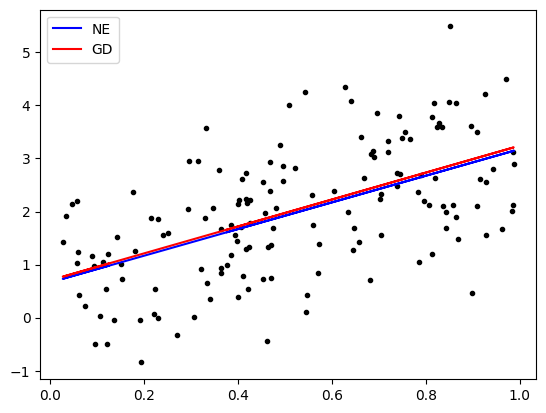

In [137]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()